# Decision Tree

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
red_wine=pd.read_csv('winequality-red.csv')
red_wine

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0      7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1      7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2     7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3     11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4      7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
...                                                 ...                                                                                                                     
1594  6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5                                                                                                                     
1595  5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...                                                                                                                     
1596  6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...                                                                                                                     
1597  5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...                                                                                                                     
1598  6;0.31;0.47;3.6;0.067;18;42;0.99549;3.39;0.66;...                                                                                                                     

[1599 rows x 1 columns]

In [46]:
white_wine=pd.read_csv('winequality-white.csv')
white_wine

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0      7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6                                                                                                                     
1     6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...                                                                                                                     
2     8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...                                                                                                                     
3     7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                                     
4     7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                                     
...                                                 ...                                                                                                                     
4893  6.2;0.21;0.29;1.6;0.039;24;92;0.99114;3.27;0.5...                                                                                                                     
4894  6.6;0.32;0.36;8;0.047;57;168;0.9949;3.15;0.46;...                                                                                                                     
4895  6.5;0.24;0.19;1.2;0.041;30;111;0.99254;2.99;0....                                                                                                                     
4896  5.5;0.29;0.3;1.1;0.022;20;110;0.98869;3.34;0.3...                                                                                                                     
4897  6;0.21;0.38;0.8;0.02;22;98;0.98941;3.26;0.32;1...                                                                                                                     

[4898 rows x 1 columns]

In [47]:
col_r=red_wine.columns
str1=col_r[0]
str1=str1.split(";")
for i in range(1,len(str1)):
    str1[i]=str1[i][1:-1]
str1

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [48]:
red_wine.iloc[1,0].split(';')

['7.8',
 '0.88',
 '0',
 '2.6',
 '0.098',
 '25',
 '67',
 '0.9968',
 '3.2',
 '0.68',
 '9.8',
 '5']

In [49]:
data=[]
for i in range(0,len(red_wine)):
    a=red_wine.iloc[i,0].split(';')
    for j in range(len(a)):
        a[j]=float(a[j])
    data.append(a)
rd_wine=pd.DataFrame(data=data,columns=str1)
for i in range(len(rd_wine)):
    rd_wine.iloc[i][11]=(0 if rd_wine.iloc[i][11]<6 else 1)
rd_wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4      0.0  
1         9.8      0.0  
2         9.8      0.0  
3         9.8      1.0  
4         9.4      0.0  
...       ...      ...  
1594     10.5      0.0  
1595     11.2      1.0  
1596     11.0      1.0  
1597     10.2      0.0  
1598     11.0      1.0  

[1599 rows x 12 columns]

In [50]:
data=[]
for i in range(0,len(white_wine)):
    a=white_wine.iloc[i,0].split(';')
    for j in range(len(a)):
        a[j]=float(a[j])
    data.append(a)
wh_wine=pd.DataFrame(data=data,columns=str1)
for i in range(len(wh_wine)):
    wh_wine.iloc[i][11]=(0 if wh_wine.iloc[i][11]<6 else 1)
wh_wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8      1.0  
1         9.5      1.0  
2        10.1      1.0  
3         9.9      1.0  
4         9.9      1.0  
...       ...      ...  
4893     11.2      1.0  
4894      9.6      0.0  
4895      9.4      1.0  
4896     12.8      1.0  
4897     11.8      1.0  

[4898 rows x 12 columns]

In [51]:
fin_data=pd.concat([rd_wine,wh_wine])
fin_data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4      0.0  
1         9.8      0.0  
2         9.8      0.0  
3         9.8      1.0  
4         9.4      0.0  
...       ...      ...  
4893     11.2      1.0  
4894      9.6      0.0  
4895      9.4      1.0  
4896     12.8      1.0  
4897     11.8      1.0  

[6497 rows x 12 columns]

In [52]:
X=fin_data.drop(columns='quality')
y=fin_data['quality']
y=pd.DataFrame(y)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=4)

In [57]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [58]:
y_pred=dtc.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [60]:
acc=accuracy_score(y_test,y_pred)
acc

0.75

In [61]:
fin_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

[Text(697.5, 978.48, 'alcohol <= 10.35\ngini = 0.465\nsamples = 5197\nvalue = [1908, 3289]\nclass = 1'),
 Text(348.75, 761.0400000000001, 'volatile acidity <= 0.252\ngini = 0.496\nsamples = 2655\nvalue = [1441, 1214]\nclass = 0'),
 Text(174.375, 543.6, 'volatile acidity <= 0.205\ngini = 0.436\nsamples = 895\nvalue = [288, 607]\nclass = 1'),
 Text(87.1875, 326.1600000000001, 'residual sugar <= 5.75\ngini = 0.362\nsamples = 429\nvalue = [102, 327]\nclass = 1'),
 Text(43.59375, 108.72000000000003, 'gini = 0.467\nsamples = 205\nvalue = [76, 129]\nclass = 1'),
 Text(130.78125, 108.72000000000003, 'gini = 0.205\nsamples = 224\nvalue = [26, 198]\nclass = 1'),
 Text(261.5625, 326.1600000000001, 'alcohol <= 9.85\ngini = 0.48\nsamples = 466\nvalue = [186, 280]\nclass = 1'),
 Text(217.96875, 108.72000000000003, 'gini = 0.496\nsamples = 358\nvalue = [163, 195]\nclass = 1'),
 Text(305.15625, 108.72000000000003, 'gini = 0.335\nsamples = 108\nvalue = [23, 85]\nclass = 1'),
 Text(523.125, 543.6, 'alco

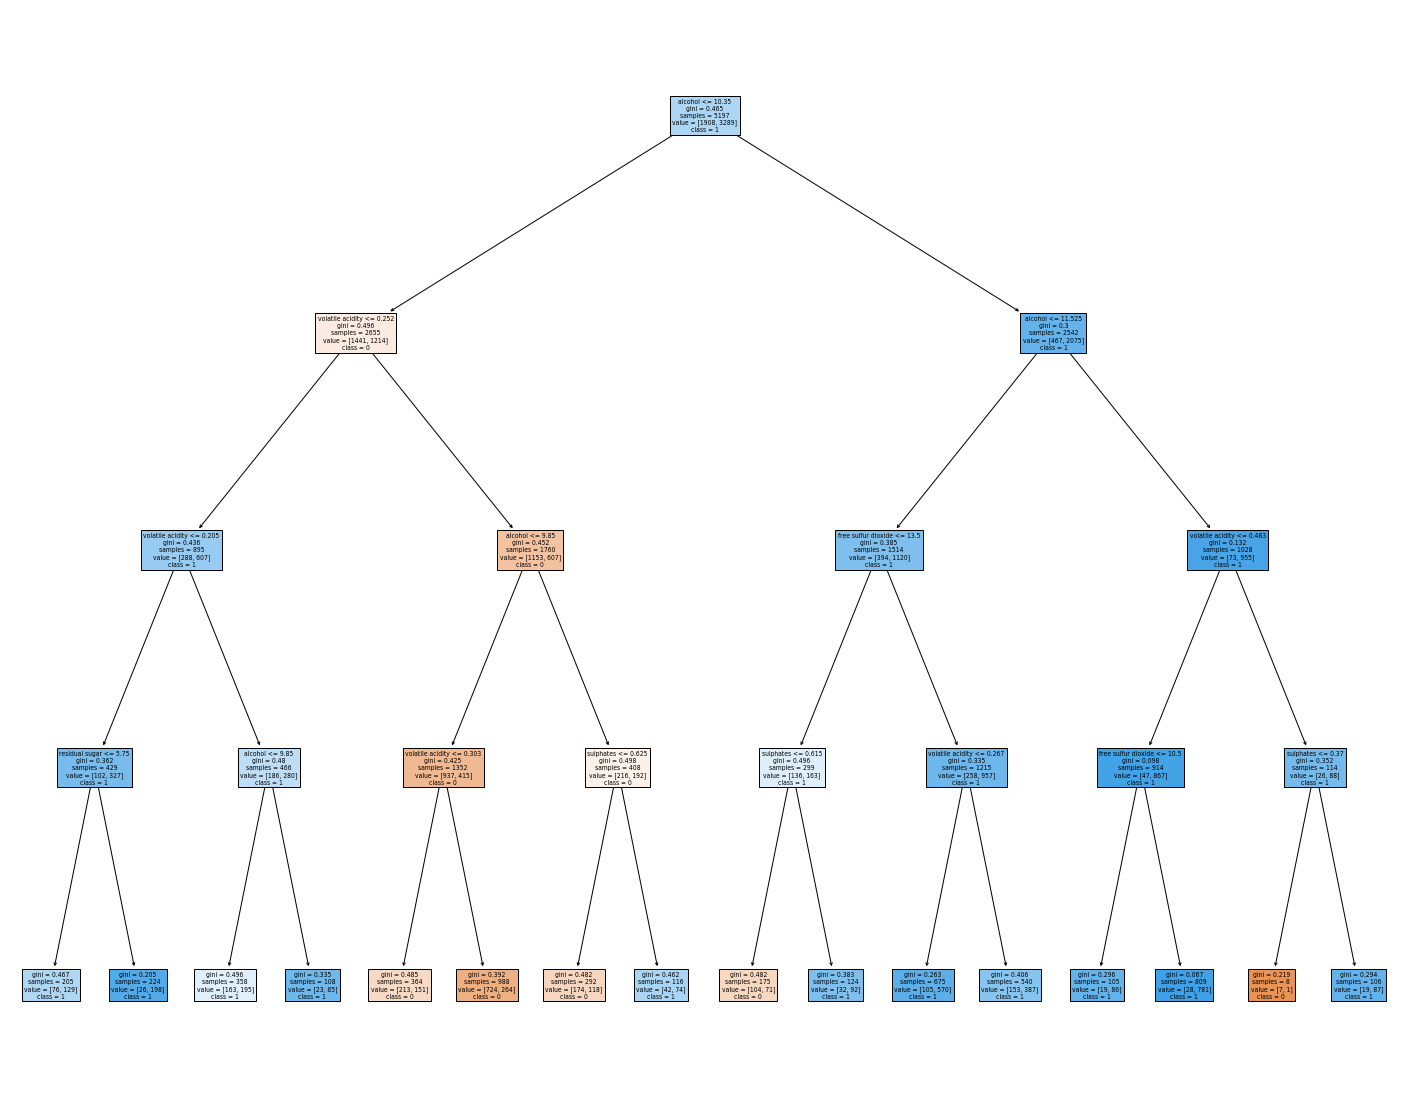

In [62]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtc,feature_names=fin_data.columns,  
                   class_names=['0','1'],
                   filled=True)

# Increasing Accuracy of model

By Using GridSearchCV 

In [63]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
param={'criterion':['gini','entropy'],'max_depth':[2,4,8,10,15,20,25]}
gsv=GridSearchCV(dtc,param)

In [64]:
gsv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 10, 15, 20, 25]})

In [65]:
gsv.best_params_

{'criterion': 'entropy', 'max_depth': 25}

In [66]:
y_pred=gsv.predict(X_test)

In [67]:
acc=accuracy_score(y_test,y_pred)
acc

0.7730769230769231

By using CrossValidation

In [68]:
from sklearn.model_selection import StratifiedKFold

In [69]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth='20')
sf=StratifiedKFold(n_splits=3)
sf

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [70]:
acc=[]
for i,j in sf.split(X,y):
#     print(X.iloc[i,:])
    X_train,X_test,y_train,y_test=X.iloc[i,:],X.iloc[j,:],y.iloc[i,:],y.iloc[j,:]
#     print(len(X_train),len(X_test))
    y_pred=gsv.predict(X_test)
    acc1=accuracy_score(y_test,y_pred)
    acc.append(acc1)
acc

[0.9506001846722069, 0.9487534626038782, 0.9639722863741339]

Here we can see here that accuracy has increased a lot if we use cross validation